In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### To Convert the .txt  files to .csv files

In [3]:
for i in range(1,420):
    
    for j in [1,2,3]:
        
        try:
            txt_file = str(i)+'_'+str(j)+'.txt'
            #change this file_txt directory to where the txt files are saved
            file_txt = open('F:/jupyter/project/sample/'+txt_file)
            
            #change the directory to specify where to save the file
            directory = 'F:/jupyter/project/sample/csv'
            file_name = str(i)+'_'+str(j)+'.csv'
            file_path = os.path.join(directory,file_name)
            
            #to create new directory uncomment the below lines
            #if not os.path.isdir(directory):
            #     os.path.mkdir(directory)
            
            
            file = open(file_path,'w')
            file.write('ppg_output\n')
            for lines in file_txt:
                line = lines.strip()
                l = line.split('\t')
                file.write('\n'.join(l))
            
            
            file.close()
            file_txt.close()
            
            
        except:
            pass

### Creating a Pandas DataFrame for the Patient ID's

In [4]:
serial = []
sample_name = []
number = 1
for i in range(1,420):
    
    for j in [1,2,3]:
        
        try:
            
            txt_file = str(i)+'_'+str(j)+'.txt'
            #change this file_txt directory to where the txt files are saved
            file_txt = open('F:/jupyter/project/sample/'+txt_file)
            
            serial.append(number)
            sample_name.append(txt_file[:-4])
            
            number += 1
            
        except: pass

serial = np.array(serial)
sample_name = np.array(sample_name)

df = pd.DataFrame(serial,columns=['serial.no'])
df['sampleID'] = sample_name
df

,serial.no,sampleID
0,1,2_1
1,2,2_2
2,3,2_3
3,4,3_1
4,5,3_2
...,...,...
652,653,418_2
653,654,418_3
654,655,419_1
655,656,419_2


## Mean and Standard Deviation of the samples

In [5]:
mean = []
standard_deviation = []

for sample_id in df['sampleID']:
    
    #directory of the .csv file
    directory = 'F:/jupyter/project/sample/csv/'
    f_name = sample_id + '.csv'
    
    file_path = os.path.join(directory,f_name)
    temp_frame = pd.read_csv(file_path)
    
    mean.append(temp_frame['ppg_output'].mean())
    standard_deviation.append(temp_frame['ppg_output'].std())
    
mean = np.array(mean)
standard_deviation = np.array(standard_deviation)

df['mean'] = mean
df['std_dev'] = standard_deviation

df

,serial.no,sampleID,mean,std_dev
0,1,2_1,2036.919048,252.540938
1,2,2_2,2033.933333,146.344625
2,3,2_3,2045.224762,150.830125
3,4,3_1,2004.390476,54.943931
4,5,3_2,2001.574286,52.859155
...,...,...,...,...
652,653,418_2,2647.587143,259.336671
653,654,418_3,2611.728571,259.246571
654,655,419_1,2606.378095,247.667533
655,656,419_2,2591.536190,295.804593


## Kurtosis of the signals

In [6]:
from scipy.stats import kurtosis
kurt = []
for sample_id in df['sampleID']:
    
    #directory of the csv file folder
    directory = 'F:/jupyter/project/sample/csv/'
    f_name = sample_id + '.csv'
    
    file_path = os.path.join(directory,f_name)
    temp_frame = pd.read_csv(file_path)
    
    kurtosis_val = kurtosis(temp_frame['ppg_output'])
    kurt.append(kurtosis_val)
    
kurt = np.array(kurt)

df['kurtosis'] = kurt

df

,serial.no,sampleID,mean,std_dev,kurtosis
0,1,2_1,2036.919048,252.540938,-0.852316
1,2,2_2,2033.933333,146.344625,-0.927452
2,3,2_3,2045.224762,150.830125,-0.776220
3,4,3_1,2004.390476,54.943931,-0.989512
4,5,3_2,2001.574286,52.859155,-0.990753
...,...,...,...,...,...
652,653,418_2,2647.587143,259.336671,-0.891094
653,654,418_3,2611.728571,259.246571,-0.222926
654,655,419_1,2606.378095,247.667533,-0.430874
655,656,419_2,2591.536190,295.804593,-0.421466


## RMS value calculation

In [7]:
rms = []
for sample_id in df['sampleID']:
    
    #path to the .csv file folder
    directory = 'F:/jupyter/project/sample/csv/'
    f_name = sample_id + '.csv'
    
    file_path = os.path.join(directory,f_name)
    temp_frame = pd.read_csv(file_path)
    
    #calculation for rms
    rms.append(np.sqrt(np.mean(temp_frame['ppg_output']**2)))

df['rms'] = np.array(rms)

df

,serial.no,sampleID,mean,std_dev,kurtosis,rms
0,1,2_1,2036.919048,252.540938,-0.852316,2052.507189
1,2,2_2,2033.933333,146.344625,-0.927452,2039.188896
2,3,2_3,2045.224762,150.830125,-0.776220,2050.776248
3,4,3_1,2004.390476,54.943931,-0.989512,2005.143032
4,5,3_2,2001.574286,52.859155,-0.990753,2002.271805
...,...,...,...,...,...,...
652,653,418_2,2647.587143,259.336671,-0.891094,2660.252086
653,654,418_3,2611.728571,259.246571,-0.222926,2624.557660
654,655,419_1,2606.378095,247.667533,-0.430874,2618.113209
655,656,419_2,2591.536190,295.804593,-0.421466,2608.355520


## Ploting the  values

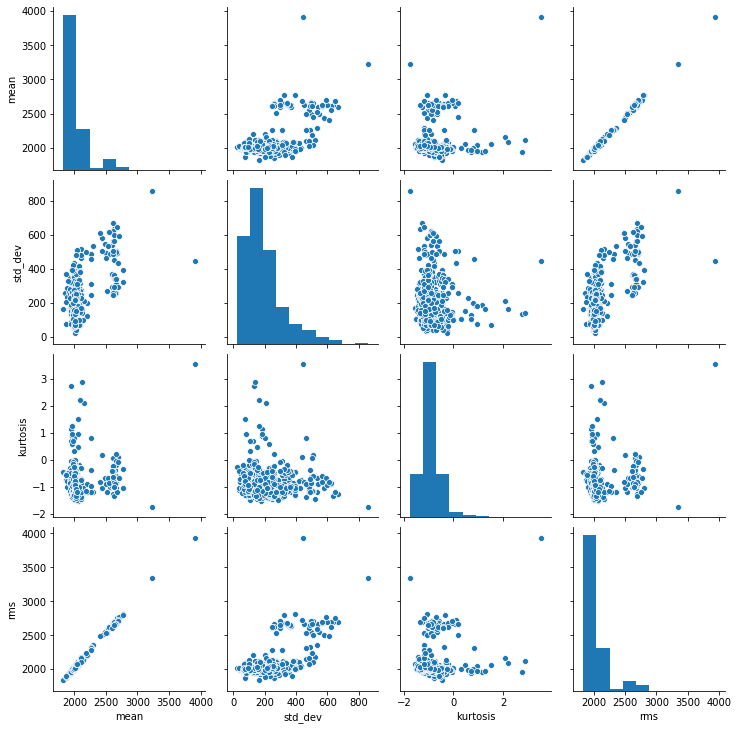

In [8]:
sns.pairplot(df[['mean','std_dev','kurtosis','rms']],palette='red')

## Saving the data frame as a .csv file

In [16]:
df.to_csv('Project-Feature-Extraction.csv',index=False,encoding='UTF-8')